# Convert analytic satellite images to 'visible' format
- very very preliminary stage., left in this for now
- notebook code shall eventually be made a .py file

In [34]:
# check whether all are needed
import numpy as np
import pandas as pd
import rasterio 
from rasterio.plot import show
from osgeo import gdal
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,12)

import hh_utilities as hu

In [1]:
# this is the preliminary definition of the function
def convert_sat_img(fn, src_type="BGRN", dest_type=["RGB"], do_visualize=True):
    """
    Converts analytic image (3 or 4 bands) to visual format and saves it.
    Input args:
    fn: string, name of file
    src_type: string, bands in source file, any of RGB, RGBA, BGRN 
        (pay attention to order)
        - RGB: normal red green blue image
        - RGBA: RGB with alpha map
        - BGRN: or 4-band image with N=near infrared
    dest_type: string or list of strings, output format, 
        any combination of RGB, PCA, and PCA-IR
        - RGB: normal red green blue image
        - PCA: grayscale image of 1st principal component
        - PCA-IR: first two principal components of RGB bands plus IR channel, so this would be
        some kind of false-color image (highly experimental)       
    do_visualize: boolean, if True, images will be displayed
    """
    pass

In [6]:
# define a few variables = input args above
fn = "/media/hh/hd_internal/_data_DS/DSR/satelliteImages/Borneo/3347/20180203_020044_1034_3B_AnalyticMS_SR.tif"
src_type = "BGRN"
dest_type = ["RGB"] 
do_visualize = True

In [ ]:
# open dataset
src = rasterio.open(fn)

In [8]:
# input error checking:
assert(src_type in ("RGB", "RGBA", "BGRN"))
assert(not set(dest_type).difference(set(["RGB", "PCA", "PCA-IR"])))
# ensure that actual and expected number of input bands match
assert(len(src_type)==src.count)

In [27]:
# preparations:
# - dictionary of colors to be used for the visual representation of 
# each band
band_color_rep = {'B': 'blue',
                  'G': 'green',
                  'R': 'red',
                  'N': 'black',
                  'A': None}

In [87]:
# set up dataframe characterizing each band
band_df = pd.DataFrame({"band_index": src.indexes, 
                        "name": list(src_type),
                        "plot_col": [band_color_rep[b] for b in list(src_type)],
                        "dtype": src.dtypes,
                        "maxval": [np.iinfo(t).max for t in src.dtypes],
                        "nodatavals": src.nodatavals,
                       }).set_index("name")
band_df

,band_index,plot_col,dtype,maxval,nodatavals
name,,,,,
B,1,blue,uint16,65535,0.0
G,2,green,uint16,65535,0.0
R,3,red,uint16,65535,0.0
N,4,black,uint16,65535,0.0


In [13]:
# dimensions
src.width, src.height



In [37]:
# read all data into numpy array (the bands are in the first dimension!)
d = src.read()

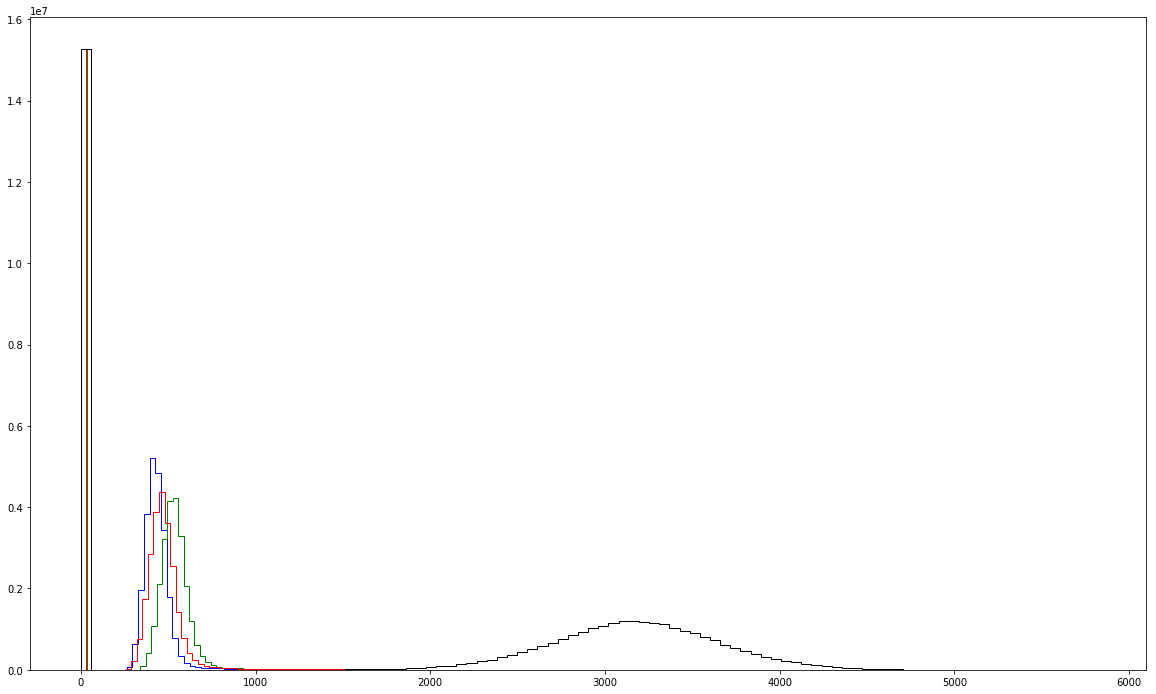

In [20]:
# visualize histograms
if do_visualize:
    figH1 = plt.figure(1)
    for band_ix in range(src.count):
        plt.hist(d[band_ix,:,:].flatten(),100,histtype='step',
                 color=band_color_rep[src_type[band_ix]])
        

As satellite images are usually at an oblique angle, there are always many pixels not belonging to the image with a value of src.nodatavals

(0.0, 0.0, 0.0, 0.0)

((1, 2, 3, 4), ('uint16', 'uint16', 'uint16', 'uint16'))

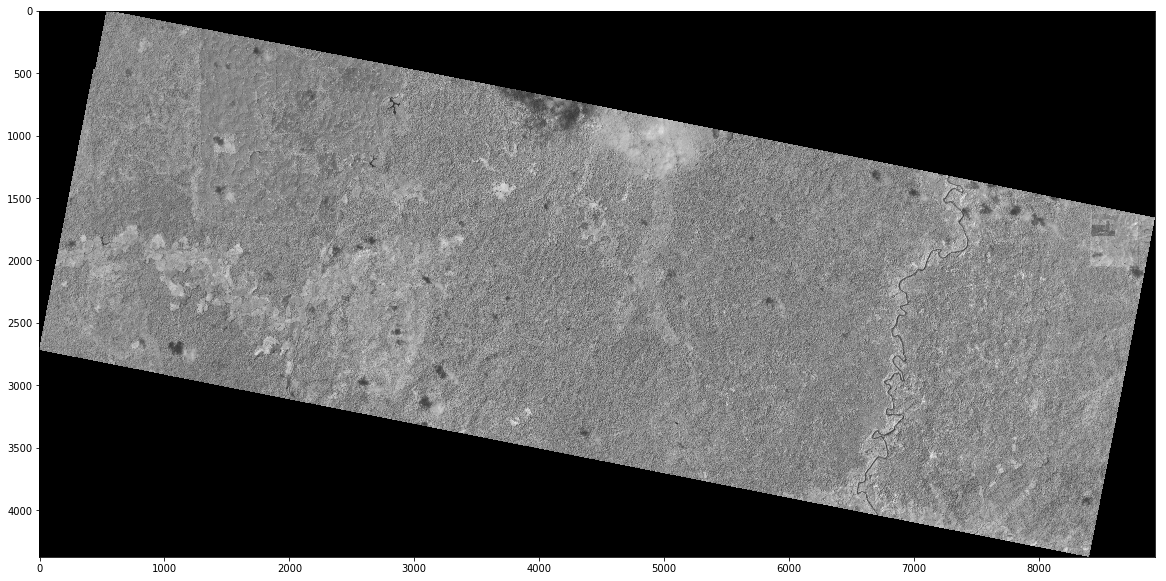

In [81]:
fig, ax = plt.subplots()
show(np.uint16(d[3]*10), ax=ax, cmap='gray')


In [ ]:
# taken from the training image generation notebook, has to be adapted
def write_tile(src, window, meta, ax_tile):
    outpath = output_tile_filename.format(TRAINING_SAT_DIR,int(window.col_off),int(window.row_off))
    with rio.open(outpath, 'w', **meta) as outds:
        tile = src.read(window=window)
        rioplot.show(tile, ax=ax_tile, cmap='gray')
        outds.write(tile)